In [1]:
# 三大件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据
import os

In [2]:
path = "data" + os.sep + "LogiReg_data.txt"
# names 指定列名
pdData = pd.read_csv(path, header = None, names = ['Exam 1', 'Exam 2', 'Admitted'])
pdData = pd.DataFrame(pdData, dtype='float')
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0


In [3]:
pdData.shape

(100, 3)

Text(0, 0.5, 'Exam 2 Score')

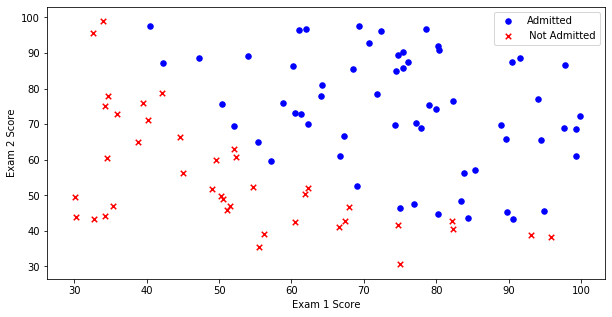

In [4]:
positive = pdData[pdData['Admitted'] == 1]
nesitive = pdData[pdData['Admitted'] == 0]

# 画图域，长宽
fig, ax = plt.subplots(figsize = (10, 5))

# 散点图
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b',marker='o', label='Admitted')
ax.scatter(nesitive['Exam 1'], nesitive['Exam 2'], s=30, c='r',marker='x', label=' Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

# The logistic regression
    sigmoid: 映射到概率的函数
    model: 返回预测结果值
    cost: 根据参数计算损失
    gradient: 计算每个参数的梯度方向
    descent: 进行参数更新
    accuracy: 计算精度

In [5]:
# sigmoid: 映射到概率的函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

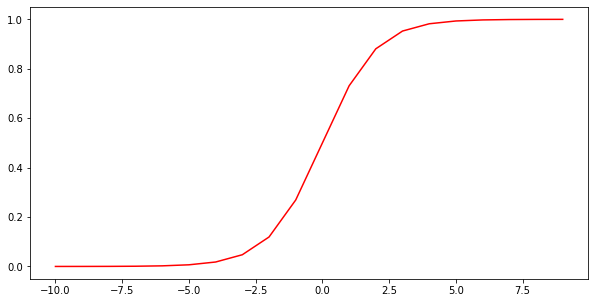

In [6]:
number = np.arange(-10, 10, step = 1)

fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(number, sigmoid(number), 'r')

In [32]:
# 得到的θx，并将其传入sigmoid()函数
def model(x, theta):
    # np.dot() 矩阵相乘
    return sigmoid(np.dot(x, theta.T))

In [8]:
# 插入θ0这列
pdData.insert(0, 'Ones', 1.0)
pdData.head()

,Ones,Exam 1,Exam 2,Admitted
0,1.0,34.623660,78.024693,0.0
1,1.0,30.286711,43.894998,0.0
2,1.0,35.847409,72.902198,0.0
3,1.0,60.182599,86.308552,1.0
4,1.0,79.032736,75.344376,1.0


In [41]:
orig_data = pdData.values
# 设置x 和y
colums = orig_data.shape[1]
# 取前三列，作为x
x = orig_data[:,0:cols-1]
# 取后三列，作为y
y = orig_data[:,cols-1:cols]
# 构建theta
theta = np.zeros([1, 3])

In [26]:
# 损失函数
def cost(x, y, theta):
    left_part = np.multiply(-y, np.log(model(x, theta)))
    right_part = np.multiply(1 - y, np.log(1 - model(x, theta)))
    return np.sum(left_part - right_part) / (len(x))

In [33]:
cost(x, y, theta)

0.6931471805599453

In [57]:
# 梯度
def gradient(x, y, theta):
    gradient = np.zeros(theta.shape)
    error = (model(x, theta) -y).ravel()
    for j in range (len(theta.ravel())):
        term = np.multiply(error, x[:,j])
        gradient[0, j] = np.sum(term) / (len(x))
    return gradient

In [52]:
import numpy.random
#洗牌
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    x = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return x, y

In [35]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    #设定三种不同的停止策略
    if type == STOP_ITER:        return value > threshold
    elif type == STOP_COST:      return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:      return np.linalg.norm(value) < threshold

In [45]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    #梯度下降求解
    
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    x, y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(x, y, theta)] # 损失值

    
    while True:
        grad = gradient(x[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize #取batch数量个数据
        if k >= n: 
            k = 0 
            x, y = shuffleData(data) #重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(x, y, theta)) # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = grad
        if stopCriterion(stopType, value, thresh): break
    
    return theta, i-1, costs, grad, time.time() - init_time

In [37]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 0.83s


array([[-0.00027127,  0.00705232,  0.00376711]])

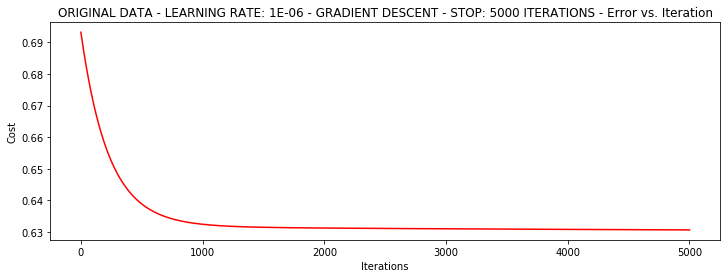

In [58]:
#选择的梯度下降方法是基于所有样本的
n=100
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

***Original data - learning rate: 0.0001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-0.00172538  0.00980537  0.00108198]] - Iter: 257 - Last cost: 0.63 - Duration: 0.04s


array([[-0.00172538,  0.00980537,  0.00108198]])

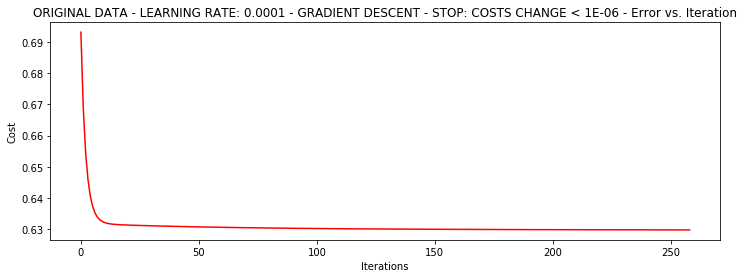

In [70]:
n=100
runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.0001)

***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 15000 iterations
Theta: [[-0.00202136  0.00999461  0.00094865]] - Iter: 15000 - Last cost: 0.63 - Duration: 0.79s


array([[-0.00202136,  0.00999461,  0.00094865]])

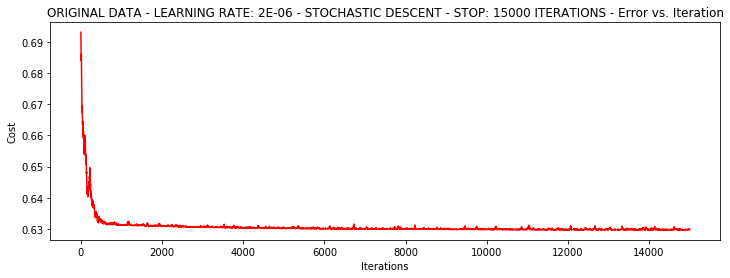

In [71]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)